In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Uploading the dataset
df = pd.read_csv(r"C:\Users\Administrator\Desktop\PremierLeague.csv")
df.head(5)

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals
0,1,Premier League,Burnley vs Manchester City,8/11/2023,Burnley,Manchester City,0,3
1,1,Premier League,Arsenal vs Nottingham Forest,8/12/2023,Arsenal,Nottingham Forest,2,1
2,1,Premier League,AFC Bournemouth vs West Ham United,8/12/2023,AFC Bournemouth,West Ham United,1,1
3,1,Premier League,Brighton & Hove Albion vs Luton Town,8/12/2023,Brighton & Hove Albion,Luton Town,4,1
4,1,Premier League,Everton vs Fulham,8/12/2023,Everton,Fulham,0,1


In [4]:
#data types
df.dtypes

round_number        int64
league_name        object
name               object
starting_at        object
home_team_name     object
away_team_name     object
home_team_goals     int64
away_team_goals     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   round_number     380 non-null    int64 
 1   league_name      380 non-null    object
 2   name             380 non-null    object
 3   starting_at      380 non-null    object
 4   home_team_name   380 non-null    object
 5   away_team_name   380 non-null    object
 6   home_team_goals  380 non-null    int64 
 7   away_team_goals  380 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 23.9+ KB


In [7]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
round_number,380.0,19.500000,10.980313,1.0,10.0,19.5,29.0,38.0
home_team_goals,380.0,1.800000,1.365616,0.0,1.0,2.0,3.0,6.0
away_team_goals,380.0,1.478947,1.277811,0.0,1.0,1.0,2.0,8.0


In [8]:
#Checking for missing values in the dataset
df.isnull().sum()

round_number       0
league_name        0
name               0
starting_at        0
home_team_name     0
away_team_name     0
home_team_goals    0
away_team_goals    0
dtype: int64

In [10]:
#Checkling for duplicates in the dataset
df.duplicated().sum()

0

Data Enhancing

In [12]:
#Total goals
df['total_goals'] = df['home_team_goals'] + df['away_team_goals']
df['total_goals']

0      3
1      3
2      2
3      5
4      1
      ..
375    5
376    2
377    6
378    4
379    3
Name: total_goals, Length: 380, dtype: int64

In [13]:
#Check if home team won
df['home_team_won'] = df.apply(lambda x: True if x['home_team_goals'] > x['away_team_goals'] else False, axis=1)
df['home_team_won']

0      False
1       True
2      False
3       True
4      False
       ...  
375     True
376     True
377    False
378     True
379    False
Name: home_team_won, Length: 380, dtype: bool

In [15]:
#Winning team
df['winning_team'] = df.apply(lambda x: x['home_team_name'] if x['home_team_goals'] > x['away_team_goals'] else 'Tie' if x['home_team_goals'] == x['away_team_goals'] else x['away_team_name'], axis=1)
df['winning_team']

0             Manchester City
1                     Arsenal
2                         Tie
3      Brighton & Hove Albion
4                      Fulham
                ...          
375            Crystal Palace
376                 Liverpool
377                    Fulham
378           Manchester City
379         Tottenham Hotspur
Name: winning_team, Length: 380, dtype: object

In [16]:
#Losing team
df['losing_team'] = df.apply(lambda x: x['home_team_name'] if x['winning_team'] == x['away_team_name'] else 'Tie' if x['winning_team'] == 'Tie' else x['away_team_name'], axis=1)
df['losing_team']

0                      Burnley
1            Nottingham Forest
2                          Tie
3                   Luton Town
4                      Everton
                ...           
375                Aston Villa
376    Wolverhampton Wanderers
377                 Luton Town
378            West Ham United
379           Sheffield United
Name: losing_team, Length: 380, dtype: object

Data Enhancement Validation

In [17]:
#Check whether winning and losing team is correct by checking if winning team is the same as losing team (should return 0)
print(len(df.loc[df['winning_team'] != 'Tie'].loc[df['winning_team'] == df['losing_team']]))

0


In [18]:
#Check whether home_team_won is correct by checking if it is only True in home winning cases (Should return True)
print(df.loc[df['home_team_goals'] > df['away_team_goals']]['home_team_won'].unique()[0])

True


In [19]:
#Exact opposite of above (Should return False)
print(df.loc[df['home_team_goals'] < df['away_team_goals']]['home_team_won'].unique()[0])

False


Winning Games

In [20]:
#Summarize wins
winning_games = df.loc[df['winning_team'] != 'Tie']
winning_games = winning_games.groupby('winning_team')['round_number'].count().reset_index()
winning_games.rename(columns={
    'round_number':'wins',
    'winning_team':'team'
},inplace=True)
winning_games.sort_values('wins', ascending=False, inplace=True)
winning_games = winning_games.reset_index(drop=True)

# Home Wins
home_wins = df.loc[df['home_team_name'] == df['winning_team']]
home_wins = home_wins.groupby('home_team_name')['round_number'].count().reset_index()
home_wins.rename(columns={
    'home_team_name':'team',
    'round_number':'home_wins'
}, inplace=True)

Losing Games

In [21]:
losing_games = df.loc[df['losing_team'] != 'Tie']
losing_games = losing_games.groupby('losing_team')['round_number'].count().reset_index()
losing_games.rename(columns={
    'round_number':'losses',
    'losing_team':'team'
},inplace=True)
losing_games.sort_values('losses', ascending=False, inplace=True)
losing_games = losing_games.reset_index(drop=True)

Total Games

In [22]:
home_games = df.groupby('home_team_name')['round_number'].count().reset_index()
home_games.rename(columns={
    'home_team_name':'team',
    'round_number':'home_games'
}, inplace=True)

away_games = df.groupby('away_team_name')['round_number'].count().reset_index()
away_games.rename(columns={
    'away_team_name':'team',
    'round_number':'away_games'
}, inplace=True)

Total Goals

In [23]:
home_goals = df.groupby('home_team_name')['home_team_goals'].sum().reset_index()
home_goals.rename(columns = {
    'home_team_name':'team',
    'home_team_goals':'home_goals'
}, inplace=True)

away_goals = df.groupby('away_team_name')['away_team_goals'].sum().reset_index()
away_goals.rename(columns = {
    'away_team_name':'team',
    'away_team_goals':'away_goals'
}, inplace=True)

Gaols Conceded

In [24]:
home_goals_conceded = df.groupby('home_team_name')['away_team_goals'].sum().reset_index()
home_goals_conceded.rename(columns = {
    'home_team_name':'team',
    'away_team_goals':'home_goals_conceded'
}, inplace=True)

away_goals_conceded = df.groupby('away_team_name')['home_team_goals'].sum().reset_index()
away_goals_conceded.rename(columns = {
    'away_team_name':'team',
    'home_team_goals':'away_goals_conceded'
}, inplace=True)

Final Table

In [26]:
from functools import reduce
import plotly.express as px
from scipy import stats

In [27]:
dataframes = [winning_games, losing_games, home_games, away_games, home_goals, away_goals, home_goals_conceded, away_goals_conceded, home_wins]
final_table = reduce(lambda  left,right: pd.merge(left,right,on=['team'],
                                            how='outer'), dataframes)

Enhance Final Table

In [28]:
#Total Games
final_table['games'] = final_table['home_games'] + final_table['away_games']

#Total Goals
final_table['goals'] = final_table['home_goals'] + final_table['away_goals']

#Goals Conceded
final_table['goals_conceded'] = final_table['home_goals_conceded'] + final_table['away_goals_conceded']

#Goal Difference
final_table['goal_difference'] = final_table['goals'] - final_table['goals_conceded']

#Ties
final_table['ties'] = final_table['games'] - (final_table['wins'] + final_table['losses'])

#Points
final_table['points'] = (final_table['wins'] * 3) + (final_table['ties'] * 1)

#Away Wins
final_table['away_wins'] = final_table['wins'] - final_table['home_wins']

#Home Win Percentage
final_table['home_win_percentage'] = final_table['home_wins'] / final_table['home_games']

#Away Win Percentage
final_table['away_win_percentage'] = final_table['away_wins'] / final_table['away_games']

Organize Final Table

In [29]:
prem_table = final_table[['team', 'points', 'games', 'wins', 'ties', 'losses', 'goals', 'goals_conceded', 'goal_difference']].sort_values('points', ascending=False).reset_index(drop=True)

final_table = final_table[['team', 'games', 'wins', 'losses', 'ties', 'points', 'goal_difference',
       'goals', 'goals_conceded', 'home_games', 'home_wins', 'home_goals',
       'home_goals_conceded', 'away_games', 'away_wins', 'away_goals',
       'away_goals_conceded', 'home_win_percentage', 'away_win_percentage']]

Premier League Table

In [30]:
prem_table

,team,points,games,wins,ties,losses,goals,goals_conceded,goal_difference
0,Manchester City,91,38,28,7,3,96,34,62
1,Arsenal,89,38,28,5,5,91,29,62
2,Liverpool,82,38,24,10,4,86,41,45
3,Aston Villa,68,38,20,8,10,76,61,15
4,Tottenham Hotspur,66,38,20,6,12,74,61,13
5,Chelsea,63,38,18,9,11,77,63,14
6,Newcastle United,60,38,18,6,14,85,62,23
7,Manchester United,60,38,18,6,14,57,58,-1
8,West Ham United,52,38,14,10,14,60,74,-14
9,Crystal Palace,49,38,13,10,15,57,58,-1


Goals per round

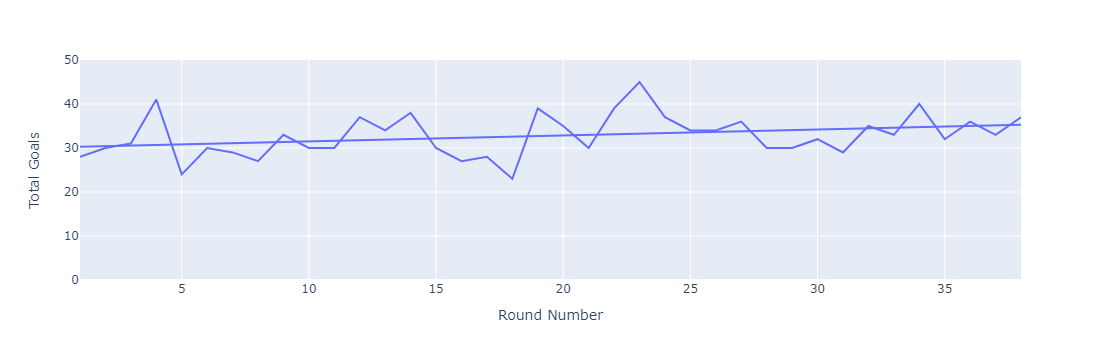

In [32]:
goals_per_round = df.groupby('round_number')['total_goals'].sum().reset_index()
fig = px.scatter(goals_per_round, x='round_number', y='total_goals', labels=dict(round_number='Round Number', total_goals='Total Goals'), trendline="ols")
fig.update_yaxes(range=[0, 50])
fig.update_traces(mode = 'lines')
fig.show()

There seems to be an upward trend as the rounds go up, as well as less variance in the data. Let's check if it's significant

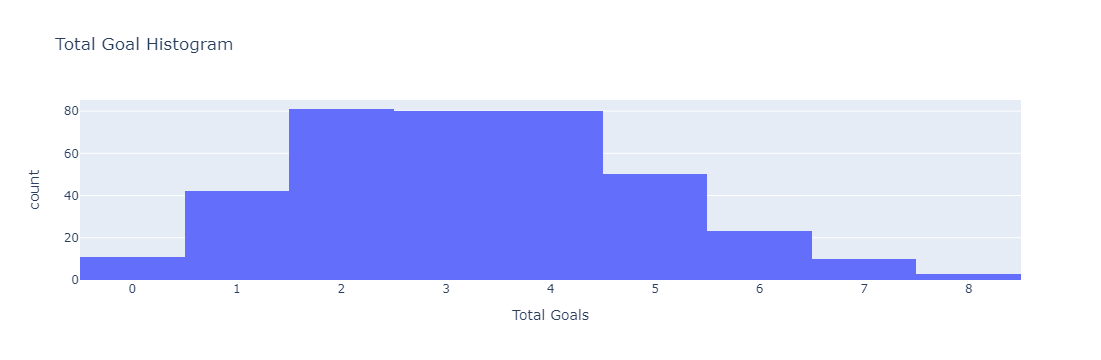

In [33]:
px.histogram(df, x='total_goals', nbins=15, labels=dict(total_goals='Total Goals'), title='Total Goal Histogram')

Mean Goals per Game

In [34]:
def significance_mean_goals(last_x):
    last_x_games = last_x
    game_one = df['round_number'].max() - last_x_games
    mean_goals_game = df['total_goals'].mean()

    exclude_last_x_games = df.loc[df['round_number'] <= game_one]
    exltg_mean_goals = exclude_last_x_games['total_goals'].mean()

    print('Mean Goals per Game')
    print(f'mean goals/game: {mean_goals_game}')
    print(f'mean goals/game (excluding last {last_x_games} games): {exltg_mean_goals} \n')

    last_ten_games = df.loc[df['round_number'] >= game_one]
    ltg_mean_goals = last_ten_games['total_goals'].mean()

    print(f'Lets take the last {last_x_games} games and see what the mean goals per game was:')
    print(f'Last {last_x_games} games mean goals/game: {ltg_mean_goals} \n')


    stat_mg, pval_mg = stats.ttest_1samp(last_ten_games['total_goals'], mean_goals_game)
    stat_emg, pval_emg = stats.ttest_1samp(last_ten_games['total_goals'], exltg_mean_goals)

    print('P Values:')

    print(f'P Value last {last_x_games} games vs mean: {pval_mg}')
    print(f'P Value last {last_x_games} vs mean (excluding last {last_x_games} games): {pval_emg}')

In [35]:
significance_mean_goals(10)

Mean Goals per Game
mean goals/game: 3.278947368421053
mean goals/game (excluding last 10 games): 3.2464285714285714 

Lets take the last 10 games and see what the mean goals per game was:
Last 10 games mean goals/game: 3.3363636363636364 

P Values:
P Value last 10 games vs mean: 0.721961529154878
P Value last 10 vs mean (excluding last 10 games): 0.5774327974416229


There doesn't seem to be any significance in the last 10 games, let's try 5:

In [36]:
significance_mean_goals(5)

Mean Goals per Game
mean goals/game: 3.278947368421053
mean goals/game (excluding last 5 games): 3.2363636363636363 

Lets take the last 5 games and see what the mean goals per game was:
Last 5 games mean goals/game: 3.5166666666666666 

P Values:
P Value last 5 games vs mean: 0.2753040239951385
P Value last 5 vs mean (excluding last 5 games): 0.1992013992425288


Doesn't seem to be significance in the mean goals in the last 5 games, let's try in the second half of the season:

In [37]:
significance_mean_goals(19)

Mean Goals per Game
mean goals/game: 3.278947368421053
mean goals/game (excluding last 19 games): 3.1 

Lets take the last 19 games and see what the mean goals per game was:
Last 19 games mean goals/game: 3.48 

P Values:
P Value last 19 games vs mean: 0.08874758422914439
P Value last 19 vs mean (excluding last 19 games): 0.0014350494005224766


Home Win Percentage (X) vs Away Win Percentage (Y)

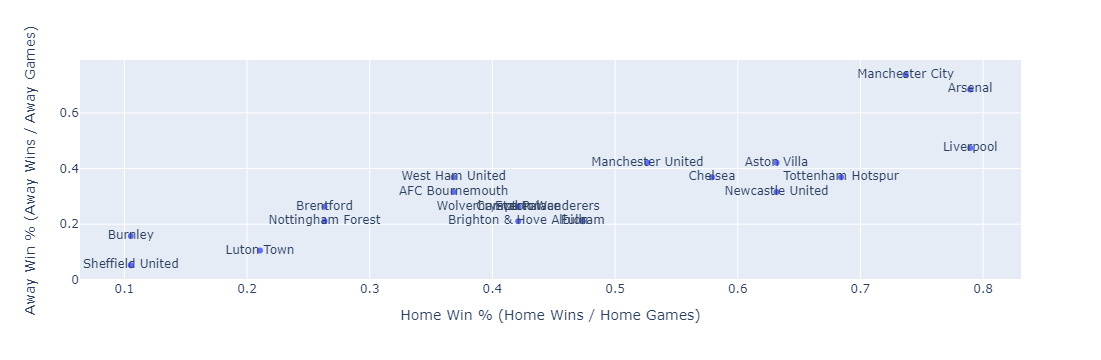

In [38]:
px.scatter(final_table, x='home_win_percentage', y='away_win_percentage', text='team', labels=dict(home_win_percentage='Home Win % (Home Wins / Home Games)', away_win_percentage='Away Win % (Away Wins / Away Games)'), size_max=60)

Home Team Win Percentage

In [39]:
df['home_team_won'].value_counts(normalize=True)

home_team_won
False    0.539474
True     0.460526
Name: proportion, dtype: float64

Average goals per team

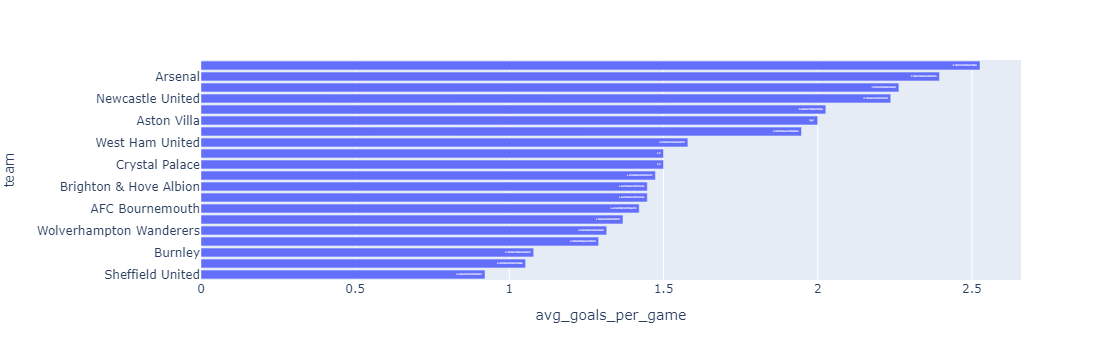

In [40]:
prem_table['avg_goals_per_game'] = prem_table['goals'] / prem_table['games']
avg_goals_df = prem_table[['team', 'avg_goals_per_game']]
avg_goals_df = avg_goals_df.sort_values('avg_goals_per_game', ascending=True)
px.bar(avg_goals_df, x='avg_goals_per_game', y='team', text='avg_goals_per_game')